## ライブラリのインポート

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#tensorflowの互換性WARNING文の回避
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.FATAL)

np.random.seed(0)


Using TensorFlow backend.


## データの生成

In [2]:
# 研修用データロード
from mldata import mldata
X,Y,X_train, X_test, Y_train, Y_test = mldata.mldata()

In [2]:
# # データロード
# # 使用するときは「ctrl+/」でコメントを外す

# mnist = datasets.fetch_openml('MNIST_784', version=1, return_X_y=False)

# n = len(mnist.data)
# N = 10000  # MNISTの一部を使う
# indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

# X = mnist.data[indices]
# y = mnist.target[indices]
# Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)


In [3]:
# 読み込んだデータをそのまま表示。28*28の整数値が格納されている。
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  43.   0.
   0.   0.   0.   0.   0.   0.  51. 150. 240. 255. 150.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.  94.  15.
   0.   0.   0.   0.  12.  94. 238. 253. 253. 253. 192.   0.   0.   0.
   0. 

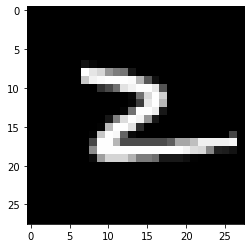

In [9]:
# X_trainの先頭のデータを表示
img = X_train[2]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')


## モデル設定

In [4]:
n_in = len(X[0])  # 784=28*28
n_hidden = 200
n_out = len(Y[0])  # 10

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in))
model.add(Activation('sigmoid'))

model.add(Dense(n_hidden))
model.add(Activation('sigmoid'))

model.add(Dense(n_hidden))
model.add(Activation('sigmoid'))

model.add(Dense(n_hidden))
model.add(Activation('sigmoid'))

model.add(Dense(n_out))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])


In [5]:
# モデルのサマリを確認する
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
__________

## モデル学習

In [6]:
epochs = 100
batch_size = 200

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/100
8000/8000 [==============================] - 1s 104us/step - loss: 2.3344 - acc: 0.1083
Epoch 2/100
8000/8000 [==============================] - 0s 52us/step - loss: 2.2997 - acc: 0.1160
Epoch 3/100
8000/8000 [==============================] - 0s 45us/step - loss: 2.2989 - acc: 0.1145
Epoch 4/100
8000/8000 [==============================] - 0s 47us/step - loss: 2.2983 - acc: 0.1146
Epoch 5/100
8000/8000 [==============================] - 0s 47us/step - loss: 2.2978 - acc: 0.1150
Epoch 6/100
8000/8000 [==============================] - 0s 48us/step - loss: 2.2972 - acc: 0.1160
Epoch 7/100
8000/8000 [==============================] - 0s 53us/step - loss: 2.2967 - acc: 0.1162
Epoch 8/100
8000/8000 [==============================] - 0s 50us/step - loss: 2.2965 - acc: 0.1158
Epoch 9/100
8000/8000 [==============================] - 0s 48us/step - loss: 2.2960 - acc: 0.1162
Epoch 10/100
8000/8000 [==============================] - 1s 68us/step - loss: 2.2952 - acc: 0.1196
Epoch 11

8000/8000 [==============================] - 0s 47us/step - loss: 2.2138 - acc: 0.2477
Epoch 84/100
8000/8000 [==============================] - 1s 94us/step - loss: 2.2110 - acc: 0.3391
Epoch 85/100
8000/8000 [==============================] - 1s 69us/step - loss: 2.2078 - acc: 0.3140
Epoch 86/100
8000/8000 [==============================] - 0s 51us/step - loss: 2.2048 - acc: 0.2900
Epoch 87/100
8000/8000 [==============================] - 0s 43us/step - loss: 2.2012 - acc: 0.3261
Epoch 88/100
8000/8000 [==============================] - 0s 44us/step - loss: 2.1976 - acc: 0.3406
Epoch 89/100
8000/8000 [==============================] - 0s 46us/step - loss: 2.1937 - acc: 0.3211
Epoch 90/100
8000/8000 [==============================] - 0s 43us/step - loss: 2.1898 - acc: 0.3331
Epoch 91/100
8000/8000 [==============================] - 0s 46us/step - loss: 2.1857 - acc: 0.3496
Epoch 92/100
8000/8000 [==============================] - 0s 52us/step - loss: 2.1813 - acc: 0.3570
Epoch 93/100


## 予測精度の評価

In [7]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)


2000/2000 [==============================] - 0s 137us/step
[2.1432542724609376, 0.392]
